In [162]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import io
from scipy import stats

In [163]:
trades = pd.read_csv('/content/historical_data.csv')
sent = pd.read_csv('/content/fear_greed_index.csv')

In [164]:
print(trades.shape)
trades.head()
trades.tail()

(211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [165]:
print(sent.shape)
sent.head()
sent.tail()

(2644, 4)


,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [166]:
trades['date'] = pd.to_datetime(trades['Timestamp'], unit = 'ms').dt.date

In [167]:
sent['date'] = pd.to_datetime(sent['date']).dt.date

In [168]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27


In [169]:
merged = trades.merge(sent[['date','classification','value']], on = 'date', how = 'left')

In [170]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  date              21

In [171]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,Greed,74.0


In [172]:
print(trades['date'].unique()[:5])
print(sent['date'].unique()[:5])

[datetime.date(2024, 10, 27) datetime.date(2025, 2, 19)
 datetime.date(2025, 6, 15) datetime.date(2024, 3, 9)
 datetime.date(2024, 7, 3)]
[datetime.date(2018, 2, 1) datetime.date(2018, 2, 2)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 5)]


In [173]:
merged['classification'].value_counts(dropna=False)

,count
classification,
Fear,133871
Greed,36289
NaN,26961
Neutral,7141
Extreme Greed,6962


<Axes: xlabel='date'>

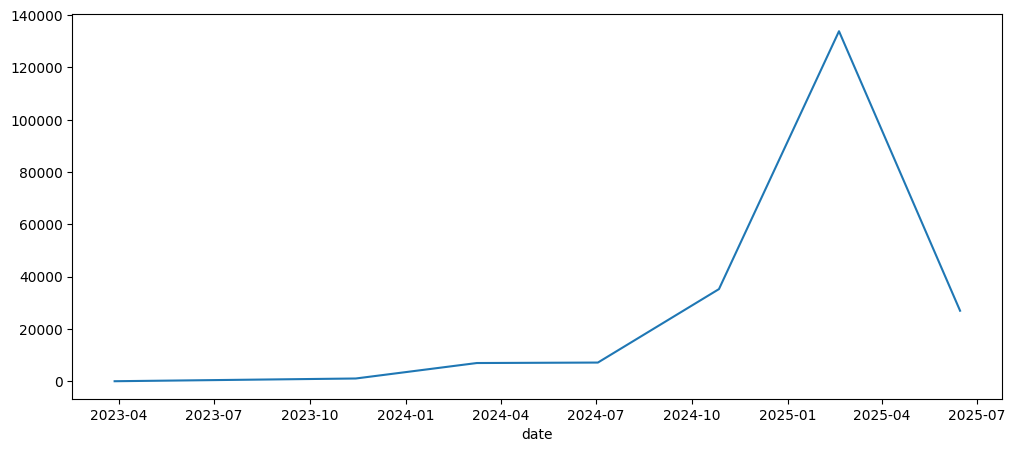

In [174]:
merged['date'].value_counts().sort_index().plot(kind = 'line', figsize=(12,5))

<Axes: xlabel='classification'>

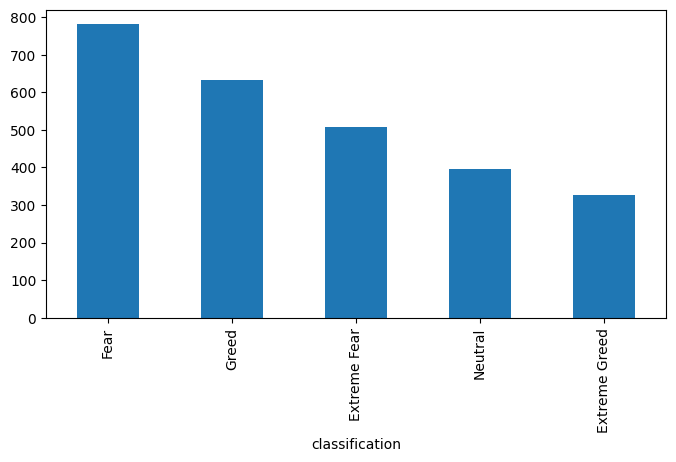

In [175]:
sent['date']= pd.to_datetime(sent['date'])
sent['classification'].value_counts()
sent['classification'].value_counts().plot(kind = 'bar', figsize = (8,4))

In [176]:
print(trades['date'].unique()[:20])
print(sent['date'].unique()[:20])

[datetime.date(2024, 10, 27) datetime.date(2025, 2, 19)
 datetime.date(2025, 6, 15) datetime.date(2024, 3, 9)
 datetime.date(2024, 7, 3) datetime.date(2023, 11, 14)
 datetime.date(2023, 3, 28)]
<DatetimeArray>
['2018-02-01 00:00:00', '2018-02-02 00:00:00', '2018-02-03 00:00:00',
 '2018-02-04 00:00:00', '2018-02-05 00:00:00', '2018-02-06 00:00:00',
 '2018-02-07 00:00:00', '2018-02-08 00:00:00', '2018-02-09 00:00:00',
 '2018-02-10 00:00:00', '2018-02-11 00:00:00', '2018-02-12 00:00:00',
 '2018-02-13 00:00:00', '2018-02-14 00:00:00', '2018-02-15 00:00:00',
 '2018-02-16 00:00:00', '2018-02-17 00:00:00', '2018-02-18 00:00:00',
 '2018-02-19 00:00:00', '2018-02-20 00:00:00']
Length: 20, dtype: datetime64[ns]


In [177]:
print(sent['date'].max())
print(sent['date'].min())

2025-05-02 00:00:00
2018-02-01 00:00:00


In [178]:
merged[merged['classification'].isna()].groupby('date').size().sort_index()

,0
date,
2025-06-15,26961


In [179]:
trades.shape

(211224, 17)

In [180]:
merged['classification'] = merged['classification'].fillna("Unknown")

In [181]:
merged['date'].nunique()

7

In [182]:
merged['date'].value_counts().sort_index()

,count
date,
2023-03-28,3
2023-11-14,1045
2024-03-09,6962
2024-07-03,7141
2024-10-27,35241
2025-02-19,133871
2025-06-15,26961


In [183]:
merged[merged['classification'].isna()].value_counts()

,,,,,,,,,,,,,,,,,,,count
Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value,


In [184]:
merged['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Unknown,26961
Neutral,7141
Extreme Greed,6962


In [185]:
merged.groupby('classification')[['Closed PnL','Size USD']].describe()

Closed PnL                                                  \
                    count       mean          std           min  25%  50%   
classification                                                              
Extreme Greed      6962.0  25.418772   306.166937  -21524.40000  0.0  0.0   
Fear             133871.0  50.047622   909.121796  -35681.74723  0.0  0.0   
Greed             36289.0  87.894859  1148.343968 -117990.10410  0.0  0.0   
Neutral            7141.0  22.229713   633.704815  -18360.67007  0.0  0.0   
Unknown           26961.0   2.659744   777.949470  -83056.32000  0.0  0.0   

                                         Size USD                              \
                      75%           max     count          mean           std   
classification                                                                  
Extreme Greed   16.186514    2500.95750    6962.0   5660.265764  11378.768734   
Fear             6.042830  135329.09010  133871.0   5259.977837  30811.757953   
Greed            9.239366   44223.45187   36289.0   3182.883845  11454.688663   
Neutral          1.950048   18282.19011    7141.0   3058.848110   8132.572825   
Unknown          1.891465   18713.88918   26961.0  11508.299879  74122.182907   

                                                                
                 min       25%       50%       75%         max  
classification                                                  
Extreme Greed   0.01  267.3025  1148.635  5000.530   178200.00  
Fear            0.00  202.9300   605.070  2017.725  3509752.98  
Greed           0.00  100.9600   499.940  1988.350   814524.17  
Neutral         0.00  179.2100   554.160  1887.850   111779.98  
Unknown         0.01  222.0000   657.220  2615.010  3921430.72

In [186]:
merged['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Unknown,26961
Neutral,7141
Extreme Greed,6962


In [187]:
sent['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [188]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [189]:
merged['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Unknown,26961
Neutral,7141
Extreme Greed,6962


In [190]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  date              21

In [191]:
merged = merged[merged['classification'] != 'Unknown'].copy()
merged['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


BEHAVIORAL FEATURES


In [192]:
daily = merged.groupby('date', as_index=False).agg({
    'Size USD': 'sum'
})

In [193]:
daily = daily.merge(
    merged[['date','classification']].drop_duplicates(),
    on='date',
    how='left'
)

In [194]:
daily.head(6)

,date,Size USD,classification
0,2023-03-28,4.770000e+02,Greed
1,2023-11-14,1.155543e+07,Greed
2,2024-03-09,3.940677e+07,Extreme Greed
3,2024-07-03,2.184323e+07,Neutral
4,2024-10-27,1.039478e+08,Greed
5,2025-02-19,7.041585e+08,Fear


**Volume**

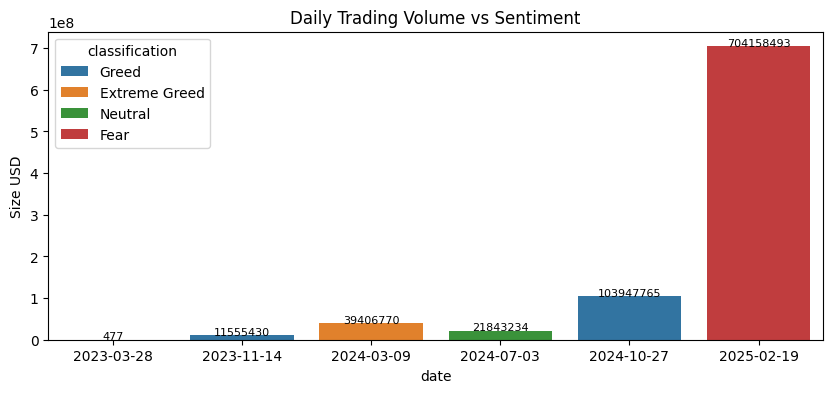

In [195]:
plt.figure(figsize=(10,4))
sns.barplot(data=daily, x='date', y='Size USD', hue='classification')
for i, v in enumerate(daily['Size USD']):
    plt.text(i, max(v, 1e5), f"{v:.0f}", ha='center', fontsize=8)
plt.title("Daily Trading Volume vs Sentiment")
plt.savefig("Daily Trading Volume vs Sentiment.png",dpi =300,bbox_inches="tight")
plt.show()

In [196]:

trades_per_trader = merged.groupby(['classification', 'Account']).size().reset_index(name='trade_count')

In [197]:
avg_trades = trades_per_trader.groupby('classification')['trade_count'].mean().reset_index()
print(avg_trades)

  classification  trade_count
0  Extreme Greed  1392.400000
1           Fear  4183.468750
2          Greed  1251.344828
3        Neutral   892.625000


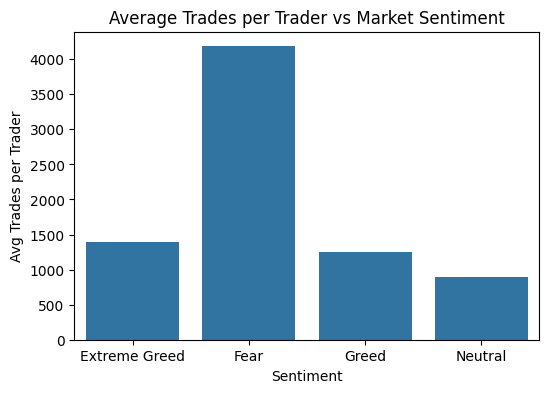

In [198]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_trades, x='classification', y='trade_count')
plt.title("Average Trades per Trader vs Market Sentiment")
plt.ylabel("Avg Trades per Trader")
plt.xlabel("Sentiment")
plt.savefig("Average Trades per Trader vs Market Sentiment.png",dpi =300,bbox_inches="tight")
plt.show()

In [199]:
trades_per_day = merged.groupby(['date']).size().reset_index(name='trade_count')
trades_per_day = trades_per_day.merge(
    merged[['date','classification']].drop_duplicates(),
    on='date',
    how='left'
)

In [200]:
trades_per_day.head(6)

,date,trade_count,classification
0,2023-03-28,3,Greed
1,2023-11-14,1045,Greed
2,2024-03-09,6962,Extreme Greed
3,2024-07-03,7141,Neutral
4,2024-10-27,35241,Greed
5,2025-02-19,133871,Fear


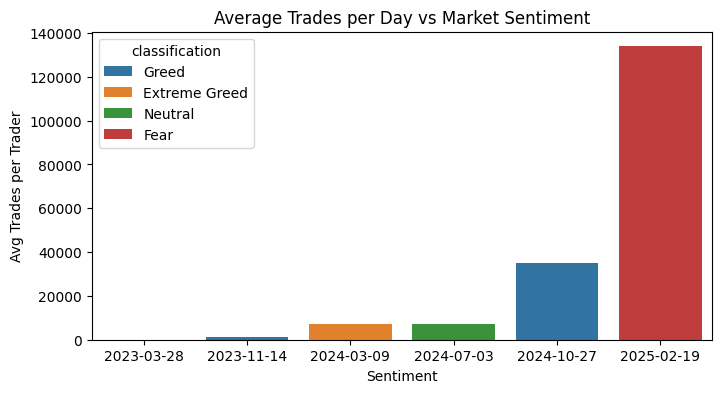

In [201]:
plt.figure(figsize=(8,4))
sns.barplot(data=trades_per_day, x='date', y='trade_count',hue = 'classification')
plt.title("Average Trades per Day vs Market Sentiment")
plt.ylabel("Avg Trades per Trader")
plt.xlabel("Sentiment")
plt.savefig("Average Trades per Day vs Market Sentiment.png",dpi =300,bbox_inches="tight")
plt.show()

In [202]:
import datetime

date_to_remove = datetime.date(2025, 6, 15)
merged_filtered = merged[merged['date'] != date_to_remove].copy()
merged = merged_filtered

print(f"Shape of merged DataFrame after removing {date_to_remove}: {merged.shape}")
merged['classification'].value_counts()

Shape of merged DataFrame after removing 2025-06-15: (184263, 19)


,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


Average Execution Price

In [203]:
avg_exec_prc = merged.groupby('classification')['Execution Price'].mean().reset_index()
print(avg_exec_prc)

  classification  Execution Price
0  Extreme Greed      9771.897315
1           Fear     11102.057978
2          Greed      5513.715386
3        Neutral      2663.132338


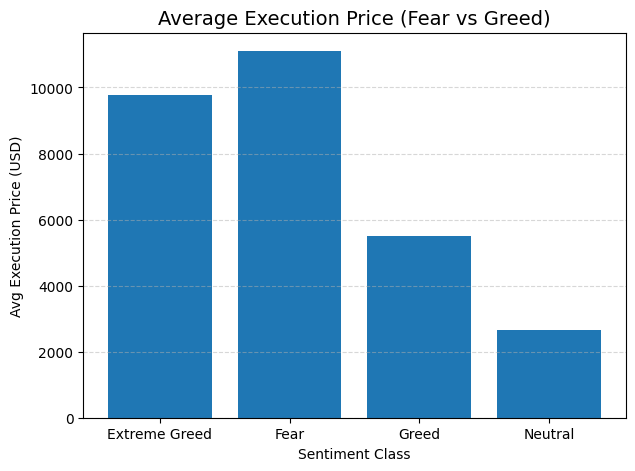

In [204]:
plt.figure(figsize=(7,5))
plt.bar(avg_exec_prc["classification"], avg_exec_prc["Execution Price"])

plt.title("Average Execution Price (Fear vs Greed)", fontsize=14)
plt.xlabel("Sentiment Class")
plt.ylabel("Avg Execution Price (USD)")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("Average Execution Price (Fear vs Greed).png",dpi =300,bbox_inches="tight")
plt.show()

Profitability

In [205]:
closed_pnl_day = merged.groupby(["date","classification"])["Closed PnL"].sum().reset_index()
closed_pnl_day

,date,classification,Closed PnL
0,2023-03-28,Greed,0.000000e+00
1,2023-11-14,Greed,1.555034e+02
2,2024-03-09,Extreme Greed,1.769655e+05
3,2024-07-03,Neutral,1.587424e+05
4,2024-10-27,Greed,3.189461e+06
5,2025-02-19,Fear,6.699925e+06


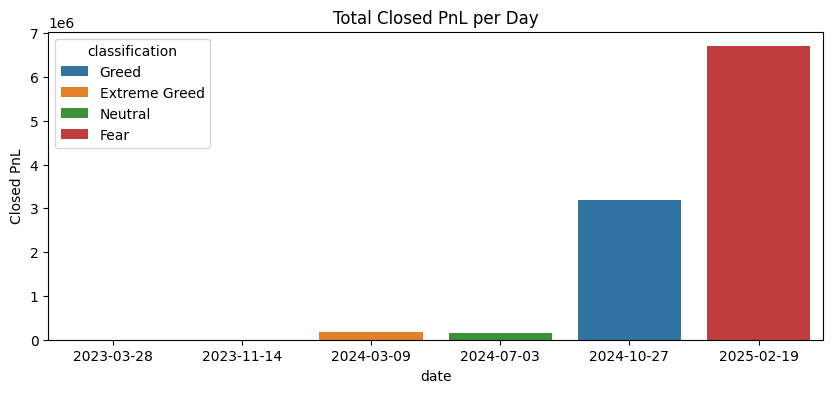

In [206]:
plt.figure(figsize=(10,4))
sns.barplot(data =closed_pnl_day , x="date", y="Closed PnL",hue = "classification")
plt.title("Total Closed PnL per Day")
plt.savefig("Total Closed PnL per Day.png",dpi =300,bbox_inches="tight")
plt.show()

In [207]:
daily_metrics = merged.groupby(['date', 'value']).agg(
    total_closed_pnl=('Closed PnL', 'sum'),
    total_size_usd=('Size USD', 'sum'),
    trade_count=('Account', 'size') # size gives the count of rows in each group
).reset_index()

# Also add the classification for labeling
daily_metrics = daily_metrics.merge(
    merged[['date', 'classification']].drop_duplicates(),
    on='date',
    how='left'
)

display(daily_metrics.head())

,date,value,total_closed_pnl,total_size_usd,trade_count,classification
0,2023-03-28,59.0,0.000000e+00,4.770000e+02,3,Greed
1,2023-11-14,69.0,1.555034e+02,1.155543e+07,1045,Greed
2,2024-03-09,84.0,1.769655e+05,3.940677e+07,6962,Extreme Greed
3,2024-07-03,50.0,1.587424e+05,2.184323e+07,7141,Neutral
4,2024-10-27,74.0,3.189461e+06,1.039478e+08,35241,Greed


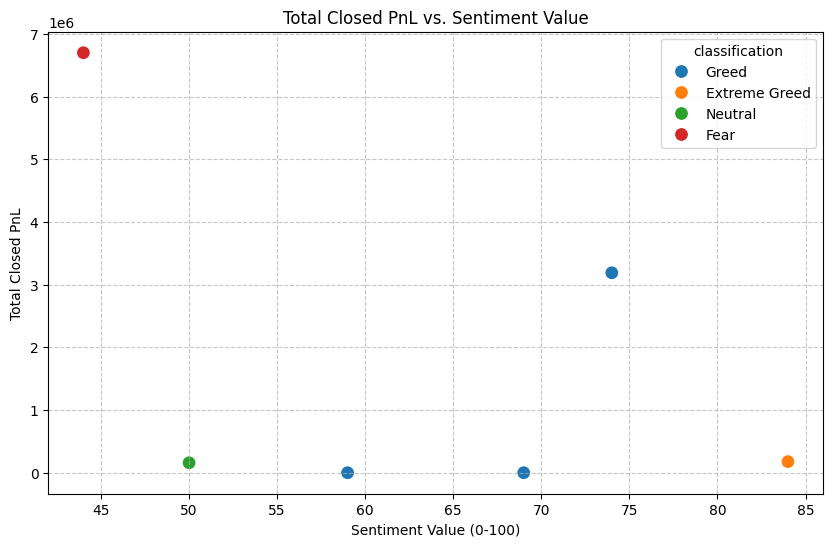

In [208]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_metrics, x='value', y='total_closed_pnl', hue='classification', s=100)
plt.title('Total Closed PnL vs. Sentiment Value')
plt.xlabel('Sentiment Value (0-100)')
plt.ylabel('Total Closed PnL')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Total Closed PnL vs. Sentiment Value.png",dpi =300,bbox_inches="tight")
plt.show()

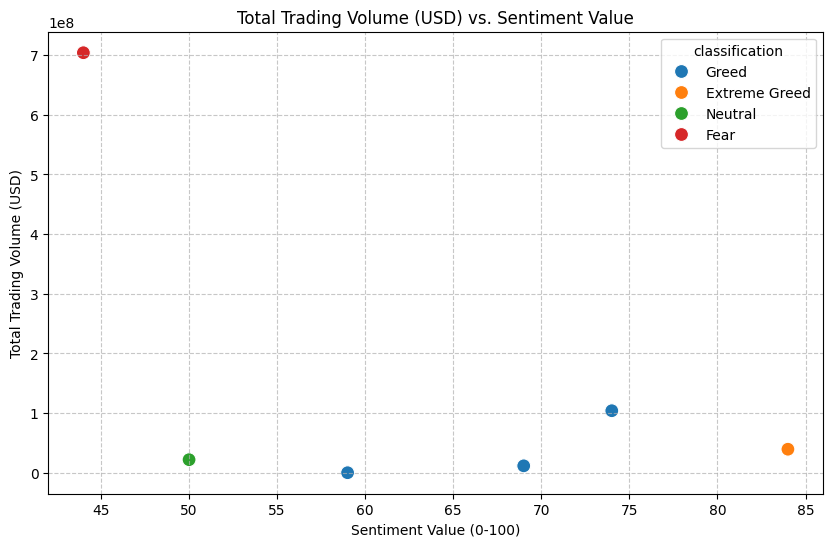

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_metrics, x='value', y='total_size_usd', hue='classification', s=100)
plt.title('Total Trading Volume (USD) vs. Sentiment Value')
plt.xlabel('Sentiment Value (0-100)')
plt.ylabel('Total Trading Volume (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Total Trading Volume (USD) vs. Sentiment Value.png",dpi =300,bbox_inches="tight")
plt.show()

Buy/Sell Ratio

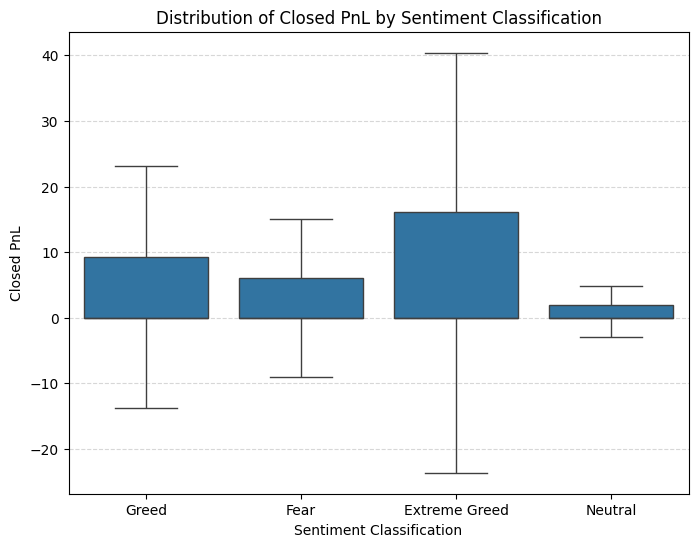

In [210]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged, x='classification', y='Closed PnL', showfliers=False) # Exclude outliers for better visualization of central tendency
plt.title('Distribution of Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("Distribution of Closed PnL by Sentiment Classification.png",dpi =300,bbox_inches="tight")
plt.show()

In [211]:

merged["is_buy"] = (merged["Side"] == "BUY").astype(int)
merged["is_sell"] = (merged["Side"] == "SELL").astype(int)

buy_sell = merged.groupby("classification")[["is_buy", "is_sell"]].sum().reset_index()

buy_sell["buy_sell_ratio"] = buy_sell["is_buy"] / buy_sell["is_sell"]

buy_sell

,classification,is_buy,is_sell,buy_sell_ratio
0,Extreme Greed,3371,3591,0.938736
1,Fear,66081,67790,0.974790
2,Greed,15421,20868,0.738978
3,Neutral,3505,3636,0.963971


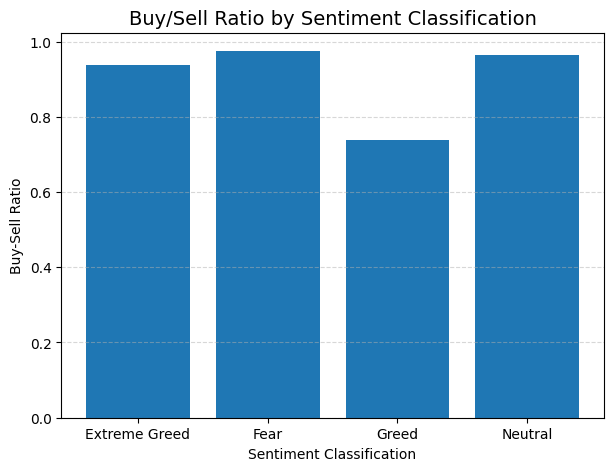

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(buy_sell["classification"], buy_sell["buy_sell_ratio"])

plt.title("Buy/Sell Ratio by Sentiment Classification", fontsize=14)
plt.xlabel("Sentiment Classification")
plt.ylabel("Buy-Sell Ratio")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("Buy-Sell Ratio by Sentiment Classification.png",dpi =300,bbox_inches="tight")
plt.show()

Risk(Standard Deviation Of Cosed PnL)

In [215]:
std_dev_pnl = merged.groupby('classification')['Closed PnL'].std().reset_index()
print(std_dev_pnl)

  classification   Closed PnL
0  Extreme Greed   306.166937
1           Fear   909.121796
2          Greed  1148.343968
3        Neutral   633.704815


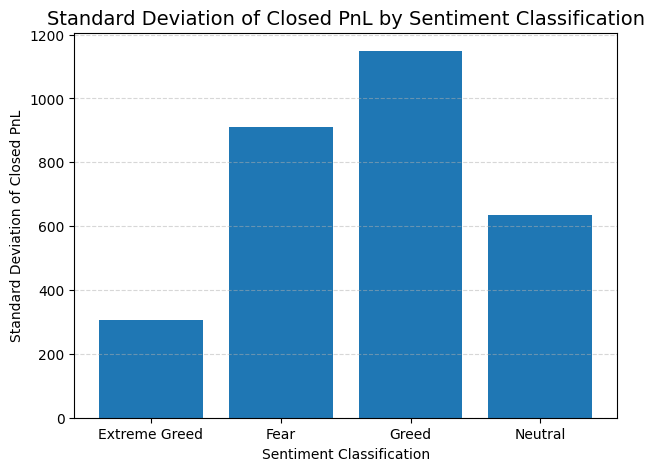

In [216]:
plt.figure(figsize=(7,5))
plt.bar(std_dev_pnl["classification"], std_dev_pnl["Closed PnL"])

plt.title("Standard Deviation of Closed PnL by Sentiment Classification", fontsize=14)
plt.xlabel("Sentiment Classification")
plt.ylabel("Standard Deviation of Closed PnL")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("Standard Deviation of Closed PnL by Sentiment Classification.png",dpi =300,bbox_inches="tight")
plt.show()

In [217]:
merged.to_csv('merged_data.csv', index=False)
print("DataFrame 'merged' saved to 'merged_data.csv'")
daily_metrics.to_csv('daily_metrics_data.csv', index=False)
print("DataFrame 'daily_metrics' saved to 'daily_metrics_data.csv'")

DataFrame 'merged' saved to 'merged_data.csv'
DataFrame 'daily_metrics' saved to 'daily_metrics_data.csv'
